<a href="https://colab.research.google.com/github/cesaenv/buscaminas/blob/main/2_Visualizaci%C3%B3nDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 2. Visualización de datos

La *visualización de datos* no es sólo una manera de preparar gráficos para los informes, sino que se utiliza en distintas fases de los proyectos.Por ejemplo, en nuestro caso se corresponde al segundo notebook de la parte obligatoria. Un porcentaje del 25% en la nota de los notebooks obligatorios nos hace ver la importancia de la exploración visual.

 A través de gráficas y tablas es posible resumir los datos y eliminar aquellos que no son relevantes para la tarea a abordar. Para las personas, los resúmenes de datos en tablas y gráficas son mucho más legibles que cientos de líneas de datos.

La visualización de datos también se utiliza para analizar el rendimiento de un modelo, ya que para interpretar modelos complejos se hace necesario proyectar espacios de alta dimensionalidad en gráficos 2D o 3D. Este notebook nos ayudará a la realización del próximo: 3. Comparativa algoritmos.

En resumen, la visualización de datos es una manera rápida de aprender algo nuevo sobre los datos con los que se está trabajando. Nos dará más información de la que ya tenemos desde el notebook anterior: 1. Análisis de los datos.

## Visualizando

### 1. Dataset

Antes de comenzar vamos a cargar las librerías que serán necesarias. Con respecto al notebook anterior, habría que cargar numpy y pandas.

Además, aparecen dos nuevas librerías [matplotlib](https://matplotlib.org/) y [seaborn](https://seaborn.pydata.org/). La versión de seaborn instalada en el entorno de Google Colaboratory no incluye algunos gráficos, por lo que lo primero que vamos a hacer es descargar la última versión de esta librería usando el siguiente comando.

In [1]:
!pip install seaborn -Uq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.4 MB/s eta 0:00:00


A continuación importamos las librerías que usaremos en este parte de la práctica.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# La siguiente línea se utiliza para generar los gráficos en formato SVG los cuales son más legibles.
%config InlineBackend.figure_format = 'svg'

Seguiremos con el dataset train.csv. Un dataset que intenta predecir la actividad que estaba realizando un paciente a partir de distintos datos, los correspondientes a las columnas del dataset.

In [4]:
df = pd.read_csv('train.csv')

Nuestro dataset constituye a una recopilación de datos por cada paciente, por lo que vamos a describir cada una de las columnas (o datos). A continuación se muestra la descripción de las distintas características de este dataset.


|  Name  | Description | Value Type |
|---         |---       |---    
| **SL** | Nivel de azúcar | Numerical |
| **EEG** | Ratio monitor EEG | Numerical |
| **BP** | Presión en sangre | Numerical |
| **HR** | Ratio de latidos | Numerical |
| **CIRCULATION** | Circulación de sangre | Numerical |

Por otro lado, *ACTIVITY* es la predicción de la actividad que estaba realizando un paciente a partir de los anteriores datos. Es el que tenemos que predecir. Posibles valores:

|  Valor  | Description
|---         |---         
| **0** | De pie |
| **1** | Caminando |
| **2** | Sentado |
| **3** | Cayendo |
| **4** | Con calambres |
| **5** | Corriendo |

### 2. Visualización univariante

El análisis univariante se centra en un descriptor cada vez. Cuando analizamos un descriptor de manera independiente estamos interesados principalmente en conocer la *distribución de sus valores* e ignoramos el resto de descriptores del dataset.

A continuación se consideran distintos tipos de análisis de una variable.


#### 2.1 Descriptores cuantitativos

Los descriptores cuantitativos se aplican a valores numéricos. Dichos valores pueden ser *discretos*, como los enteros, o *continuos*, como los reales, y suelen expresar una contabilización o medida.

*Histogramas y gráficos de densidad*

La manera más sencilla de ver la distribución de una variable númerica consiste en mostrar su *histograma*, para ello podemos usar el método [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html) de un `DataFrame`.

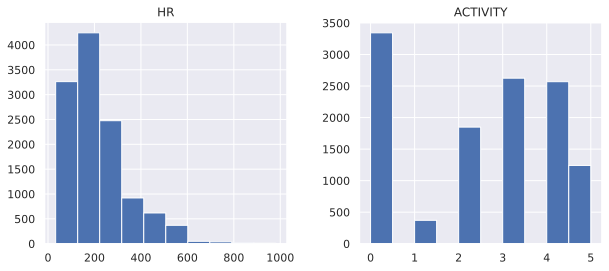

In [8]:
features = ["HR", 'ACTIVITY']
df[features].hist(figsize=(10, 4));

Un histograma agrupa los valores en cajas, o *bins*, de rangos de valores. La forma del histograma puede contener pistas sobre la distribución subyacente: Gaussiana, exponencial, etc. Con los histogramas también es posible detectar anomalías. Conocer la distribución de los descriptores es importante debido a que la mayoría de algoritmos de aprendizaje automático asumen que tienen un tipo particular (normalmente una Gaussiana).

En el gráfico anterior, vemos que la variable *HR* sigue una distribución normal pero está desviada hacia la derecha (su cola es más larga en el lado derecho). Mientras que, por el lado de la variable *ACTIVITY*, el histograma nos muestra la cantidad de filas por cada resultado. Nos da una muestra gráfica de cuáles son los valores de actividad más comunes.

También hay otra manera, muchas veces más clara, de ver las distribuciones y son los gráficos de densidad. Estos pueden verse como una versión [suavizada](https://en.wikipedia.org/wiki/Kernel_smoother) de los histogramas. Su principal ventaja es que no tienen una dependencia con el tamaño de las *bins*. Vamos a ver cómo se crean estos diagramas para las mismas dos variables que antes.

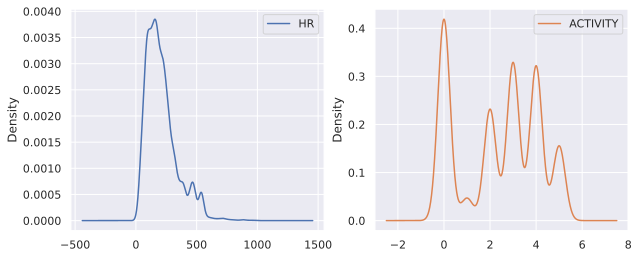

In [9]:
df[features].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(10, 4));

También es posible mostrar la distribución de las observaciones con el método [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) de la librería seaborn. Por ejemplo, vamos a ver la distribución para la variable  *HR*.

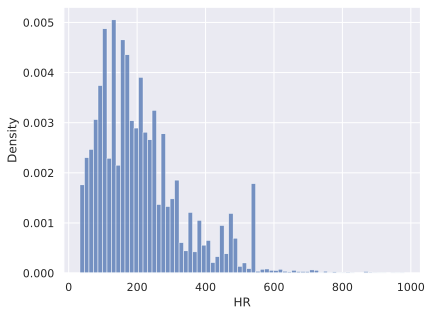

In [10]:
sns.histplot(df['HR'],stat="density");

La altura de cada barra del histograma muestra la densidad en lugar del número de ejemplos en cada bin.

*Gráficos de cajas*

Otro tipo útil de visualización son los gráficos de cajas, para los cuales la librería seaborn puede ser utilizada.

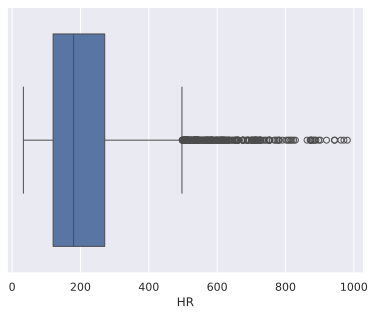

In [11]:
sns.boxplot(x='HR', data=df);

Veámos cómo interpretar el gráfico anterior. Sus componentes son una caja (que es por lo que se conoce a este tipo de gráficos como gráficos de cajas), los *bigotes*, y un número de puntos (conocidos como *outliers* o valores atípicos).

La caja muestra la extensión intercuartil de la distribución, su longitud viene dada por los percentiles $25 \, (\text{Q1})$ y $75 \, (\text{Q3})$. La línea vertical en la caja muestra la mediana de la distribución.

Los bigotes son las líneas horizontales que salen de la caja. Estas representan la dispersión completa de los puntos de datos, específicamente los puntos que caen en el intervalo $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, donde $\text{IQR} = \text{Q3} - \text{Q1}$ es el [rango intercuartílico](https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico).

Los valores atípicos caen fuera del rango definido por los bigotes y se muestran como puntos individuales.

A partir del gráfico anterior podemos ver que es común que haya valores atípicos.

*Gráficos de violines*

El último tipo de gráfico de distribución que vamos a ver son los gráficos de violines.

En la figura de abajo podemos ver un gráfico de violines. En la parte izquierda vemos el ya familiar gráfico de cajas, mientras que en la derecha vemos el gráfico de violínes donde de ha estimado la densidad del núcleo en ambos lados.

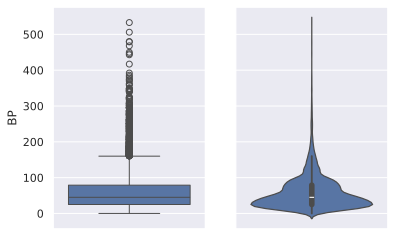

In [19]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['BP'], ax=axes[0]);
sns.violinplot(data=df['BP'], ax=axes[1]);

La diferencia entre estos dos gráficos reside en que el gráfico de cajas se centra en mostrar ciertas estadísticas de los datos, mientras que el de violínes se concentra más en mostrar la distribución como un todo.

*describe()*

Además de las herramientas gráficas, es posible obtener una serie de estadísticas de la distribución usando el método [`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) de un `DataFrame`:

In [20]:
df.describe()

,SL,EEG,BP,HR,CIRCULATION,ACTIVITY
count,1.199900e+04,1.199900e+04,11999.000000,11999.000000,11999.000000,11999.000000
mean,7.566022e+04,-2.229112e+04,58.483874,212.415535,2900.695058,2.368947
std,1.266692e+05,1.284765e+05,48.146245,130.375027,3789.822123,1.736608
min,4.222420e+01,-3.396800e+06,0.000000,33.000000,5.000000,0.000000
25%,1.006220e+04,-5.889500e+03,25.000000,120.000000,587.000000,0.000000
50%,3.243530e+04,-3.498580e+03,45.000000,180.000000,1626.000000,3.000000
75%,8.156320e+04,-2.290000e+03,79.000000,271.000000,3539.000000,4.000000
max,2.352450e+06,1.410000e+06,533.000000,981.000000,41819.000000,5.000000


La salida anterior es autoexplicativa. Los valores *25%*, *50%* y *75%* muestran los correspondientes [percentiles](https://es.wikipedia.org/wiki/Percentil).

#### 2.2 Datos categóricos y binarios

Los descriptores categóricos toman un número fijo de valores. Cada uno de estos valores asigna una observación al grupo correspondiete, cada grupo se conoce como categoría. Los descriptores binarios son un caso particular de los descriptores categóricos que solo toman dos posibles valores. Si los valores categóricos tienen un orden, se los conoce como ordinales.

*Tabla de frecuencias*

Veámos el balance de clases en nuestro dataset mirando la distribución de la variable *churn*. Para ello vamos a considerar la tabla de frecuencias que muestra como de frecuente es cada valor categórico. Para ello usamos el método [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html):

### 3. Visualización multivariante

### 4. Dataset completo